<a href="https://colab.research.google.com/github/AbhishekThakur0126/Job_Scrapper/blob/main/Final_Updated_Numerical_Programming_in_Python_Job_Scrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






## **GitHub Link -** https://github.com/AbhishekThakur0126/Job_Scrapper/tree/main

## **Project Summary:**

This Python script is an automated web scraping project designed to gather job postings from the TimesJobs website for the title "Python Developer." This project shows you how to parse HTML content using BeautifulSoup, send HTTP GET queries using the requests package, and arrange the retrieved data into an organized format using pandas. It retrieves essential information from every job posting, including the firm name, necessary qualifications, years of experience, location, job description, and a direct link to the posting, by looping through several search result pages. After that, the gathered data is saved to a CSV file and placed in a Pandas DataFrame for additional examination or use.

## **Explanation:**

Using Python web scraping, the aim of this project is to automatically collect job ads from the TimesJobs website with the title "Python Developer." This project demonstrates the process of collecting data from an internet source step-by-step using multiple Python tools.


1. Import Necessary Libraries:
   - Initially, the script imports requests, BeautifulSoup, and pandas, which are necessary Python libraries.

2. Decide on the search parameters and base URL.
   It is defined that the TimesJobs website's base URL is "https://www.timesjobs.com/candidate/job-search.html."
   "- The search parameters are kept in a dictionary that is called "parameters". Included in these criteria are the search type, location (such as "India"), search phrases (such as "Python Developer"), and startPage, the first page number.

3. For the purpose of storing the job data that has been scraped, an empty list called "jobs_data1" is formed.

4.Data Scraping from Multiple Pages: - The script runs in a loop, collecting data from several search result pages. The amount of pages it will scrape is determined by the "sequence" parameter, which is exceeded by the "startPage" parameter.

5. Send an HTTP GET Request: - Using the requests library, an HTTP GET request is sent inside the loop with the appropriate parameters to the TimesJobs website.

6.Parse HTML Content: - BeautifulSoup's 'lxml' parser is used to parse the response's HTML content.

7. The process of locating job advertisements involves looking for HTML elements that have the class "clearfix job-bx wht-shd-bx."

8. Extraction of Job Data: - Relevant details, such as the job description, firm name, location(s), years of experience, skills necessary, and a link to the job posting, are taken from each job listing and saved in a dictionary called "data."

9. Append Data to the List: - For every job listing on the page, the "data" dictionary is appended to the "jobs_data1" list.

10. Add to the Page Parameter: - To access the following page of search results, add to the "startPage" parameter.

11. To create a Pandas DataFrame, take the "jobs_data1" list and use it to generate a new one once all the job data has been gathered.

12. Data is stored as a CSV file called "job_listings10.csv," with the index column left out.


This project shows how to scrape job ads from websites, parse the HTML content, find pertinent information, and store it in an orderly fashion using Python. Web scraping for employment-related information is presented as a valuable use case, and it also provides a framework for similar data extraction activities from other websites.

Implementin web scrapping on [Timesjobs.com](https://www.timesjobs.com/)

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def extract_job_data(job):
    data = {}
    data['Company'] = job.find('h3', class_='joblist-comp-name').get_text(strip=True)
    data['Skills'] = job.find('span', class_='srp-skills').get_text(strip=True)

    ul = job.find('ul', class_='top-jd-dtl clearfix').findChildren(recursive=False)
    data['Exp'] = ul[0].find(text=True, recursive=False)

    data['Location(s)'] = ul[1].span.text if ul[1].span else None

    ul1 = job.find('ul', class_='list-job-dtl clearfix').findChildren(recursive=False)
    data['Desc'] = ul1[0].find('label').next_sibling.strip()

    data['link'] = job.header.h2.a['href']
    return data

def scrape_jobs(url, keywords, location, sequence, output_filename):
    jobs_data = []

    for start_page in range(1, sequence + 1):
        search_params = {
            'searchType': 'personalizedSearch',
            'from': 'submit',
            'luceneResultSize': 50,
            'txtKeywords': keywords,
            'txtLocation': location,
            'sequence': sequence,
            'startPage': start_page
        }

        response = requests.get(url, params=search_params)
        soup = BeautifulSoup(response.text, 'lxml')
        jobs = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

        if not jobs:
            break

        for job in jobs:
            job_data = extract_job_data(job)
            jobs_data.append(job_data)

    df = pd.DataFrame(jobs_data)

    df.to_csv(output_filename, index=False)

    return df

# Example usage:
url = 'https://www.timesjobs.com/candidate/job-search.html'
keywords = 'python developer'
location = 'Bangalore'
sequence = 5
output_filename = 'jobs_data.csv'

scrape_jobs(url, keywords, location, sequence, output_filename)


""


In [3]:
# calling the function to scrape jobs and save to a CSV file
df = scrape_jobs("https://www.timesjobs.com/candidate/job-search.html", "Python Developer", "India", 3, "job_listings10.csv")

<ipython-input-2-233ebe9de118>:11: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  data['Exp'] = ul[0].find(text=True, recursive=False)


In [4]:
df

,Company,Skills,Exp,Location(s),Desc,link
0,anicalls pty ltd,"jms , junit , ibm os / mvs , ims ,...",5 - 8 yrs,Mumbai,Industry: ITTotal Positions: 2Job Type: Full T...,https://www.timesjobs.com/job-detail/senior-py...
1,anicalls pty ltd,"aws / azure , ci / cd , jenkins / ...",8 - 12 yrs,Hyderabad/Secunderabad,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
2,anicalls pty ltd,"aws / azure , ci / cd , jenkins / ...",8 - 12 yrs,Hyderabad/Secunderabad,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
3,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8 - 12 yrs,Chennai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
4,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8 - 12 yrs,Chennai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
...,...,...,...,...,...,...
130,TandA HR Solutions,"tdd , bdd , git ,python, restful apis...",3 - 6 yrs,Panchkula,Opening for Python Developer profile for an IT...,https://www.timesjobs.com/job-detail/opening-f...
131,TandA HR Solutions,"python, front end technologies ,pythonweb f...",3 - 8 yrs,Chandigarh,Urgent opening for the Python Developer profil...,https://www.timesjobs.com/job-detail/urgent-op...
132,TandA HR Solutions,"python, front end technologies ,pythonweb f...",3 - 8 yrs,Chandigarh,Urgent opening for the Python Developer profil...,https://www.timesjobs.com/job-detail/urgent-op...
133,Nutanix,"pythonprogramming , automation , web t...",8 - 11 yrs,Bengaluru / Bangalore,SMTS - Cloud and Virtualisation Computers / So...,https://www.timesjobs.com/job-detail/smts-clou...


In [5]:
#lets check the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      135 non-null    object
 1   Skills       135 non-null    object
 2   Exp          135 non-null    object
 3   Location(s)  135 non-null    object
 4   Desc         135 non-null    object
 5   link         135 non-null    object
dtypes: object(6)
memory usage: 6.5+ KB


## **Data cleanning**

**Checking Null Values if Any**

In [6]:
df.isnull().sum()

Company        0
Skills         0
Exp            0
Location(s)    0
Desc           0
link           0
dtype: int64

**No Null values present**

**There are multiple Job positions with the name of same company. That will count as duplicates , so we will be avoid dropping them**

## **Cleaning and formatting the 'Exp' column to extract numeric experience values.**

In [7]:
# Clean and format the 'Exp' column
df['Exp'] = df['Exp'].str.replace(' yrs', '').str.replace(' Yrs', '').str.replace('yr', '').str.replace('Yr', '').str.strip()
df['Exp'] = df['Exp'].str.extract(r'(\d+)').astype(float)

##**Cleaning and formatting the 'Location(s)' column to remove extra spaces.**

In [8]:
# Clean and format the 'Location(s)' column to remove extra spaces
df['Location(s)'] = df['Location(s)'].str.replace('\s+', ' ', regex=True).str.strip()

##**Cleaning and formatting the 'Skills' column by stripping extra whitespace.**

In [9]:
# Clean and format the 'Skills' column by stripping extra whitespace
df['Skills'] = df['Skills'].str.strip()

In [10]:
df.head(n = 30)

,Company,Skills,Exp,Location(s),Desc,link
0,anicalls pty ltd,"jms , junit , ibm os / mvs , ims ,...",5.0,Mumbai,Industry: ITTotal Positions: 2Job Type: Full T...,https://www.timesjobs.com/job-detail/senior-py...
1,anicalls pty ltd,"aws / azure , ci / cd , jenkins / ...",8.0,Hyderabad/Secunderabad,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
2,anicalls pty ltd,"aws / azure , ci / cd , jenkins / ...",8.0,Hyderabad/Secunderabad,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
3,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8.0,Chennai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
4,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8.0,Chennai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
5,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8.0,Mumbai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
6,anicalls pty ltd,"aws , azure , ci / cd , jenkins , ...",8.0,Mumbai,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/python-de...
7,anicalls pty ltd,"aws or azure , ci / cd , jenkins ,...",8.0,Bengaluru / Bangalore,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
8,anicalls pty ltd,"aws or azure , ci / cd , jenkins ,...",8.0,Bengaluru / Bangalore,Industry: ITTotal Positions: 3Job Type: Full T...,https://www.timesjobs.com/job-detail/devops-py...
9,INSPIRATION MANPOWER,"algorithms , orchestration , docker , se...",5.0,Bengaluru / Bangalore,Job RequirementWe are hiring!!- Python Develop...,https://www.timesjobs.com/job-detail/python-de...


## **Data is Cleaned now lets do some visualizations**

## **Data Visualization**

**Count of Job Listings by Company**

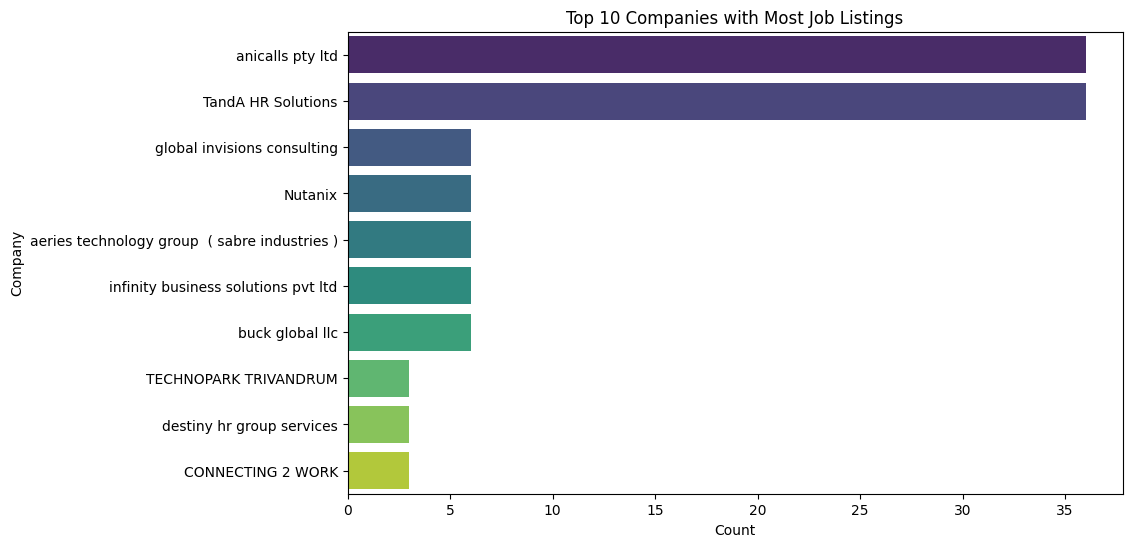

In [24]:
import seaborn as sns

# Count job listings by company
company_counts = df['Company'].value_counts()

# Get the top 10 companies
top_10_companies = company_counts.head(10)

# Plot using seaborn with a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_companies.values, y=top_10_companies.index, palette='viridis')
plt.title('Top 10 Companies with Most Job Listings')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()



**Observations:**:
* As you can see, Anicalls Pty Ltd and Tanda HR Solutions hire aggressively.
* Their businesses appear to be expanding.

 **Job Experience Distribution**

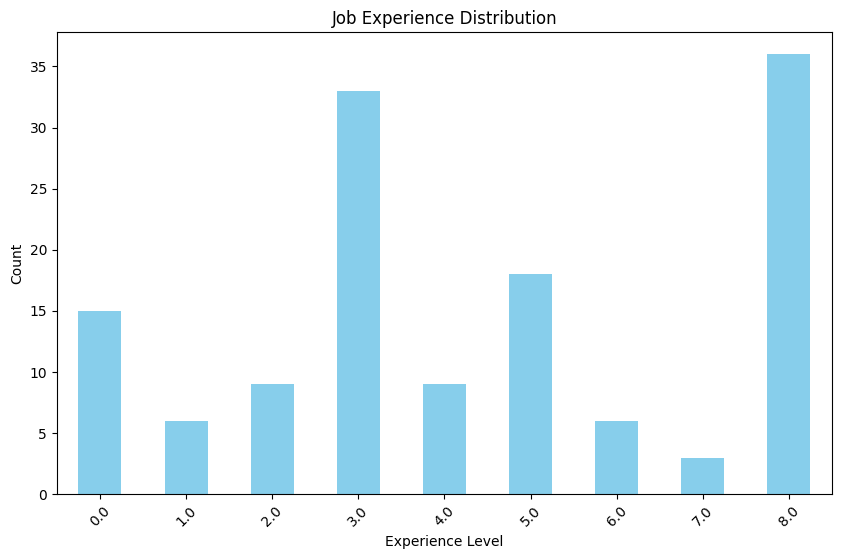

In [14]:
import matplotlib.pyplot as plt

# Plot the distribution of job experience levels
plt.figure(figsize=(10, 6))
df['Exp'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Job Experience Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## **Observation:**
* Experienced Python Developers can find plenty of work in India.
* Very few jobs are held by Freshers with no experience.

**Skills Required**

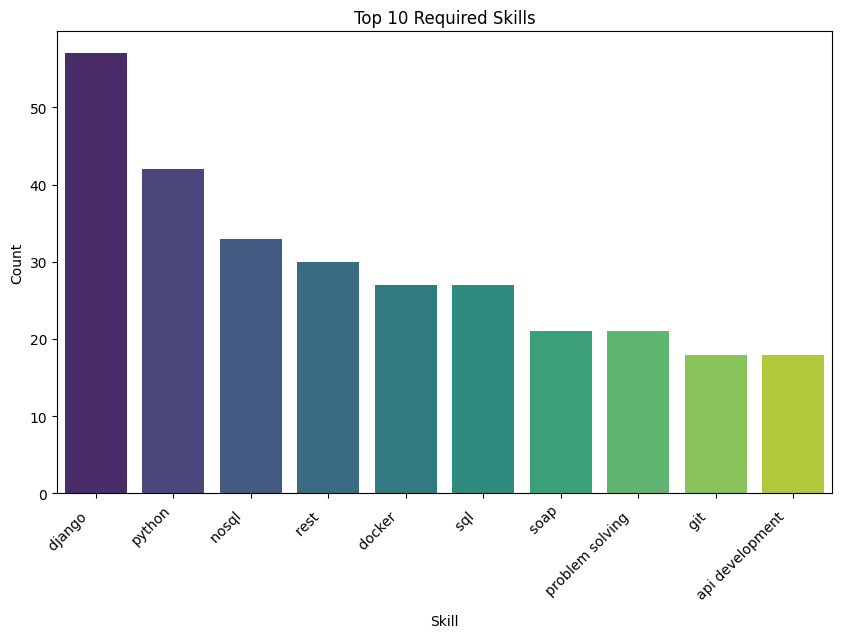

In [15]:
import seaborn as sns

# Plot the most common skills required
skills_counts = df['Skills'].str.split(', ').explode().value_counts()

# Get the top 10 skills
top_10_skills = skills_counts.head(10)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_skills.index, y=top_10_skills.values, palette='viridis')
plt.title('Top 10 Required Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


## **Observations:**
* You must be knowledgeable in the following technologies to be considered for Python developer jobs: django, Python, Rest, NoSQL, and Docker. These are in-demand talents, and employers are looking for these tech specialists.

**Bar Plot of Top 10 Locations with Most Job Listings**

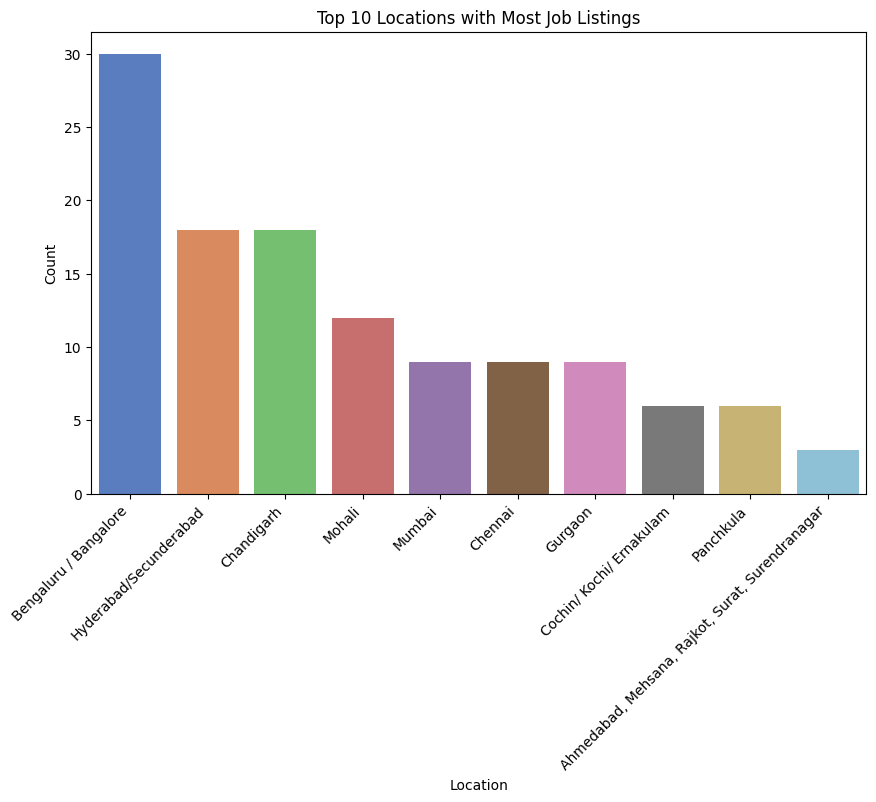

In [16]:
import seaborn as sns

# Count job listings by location
location_counts = df['Location(s)'].value_counts()

# Get the top 10 locations
top_10_locations = location_counts.head(10)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='muted')
plt.title('Top 10 Locations with Most Job Listings')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()



**Observation:**
* Based on job locations, the majority of these organizations hire at Bengluru;
* A large number of them hire at Chandigarh and Hydrabad  
* logically, given that these are India's IT centers.



**Word Cloud of Job Descriptions**

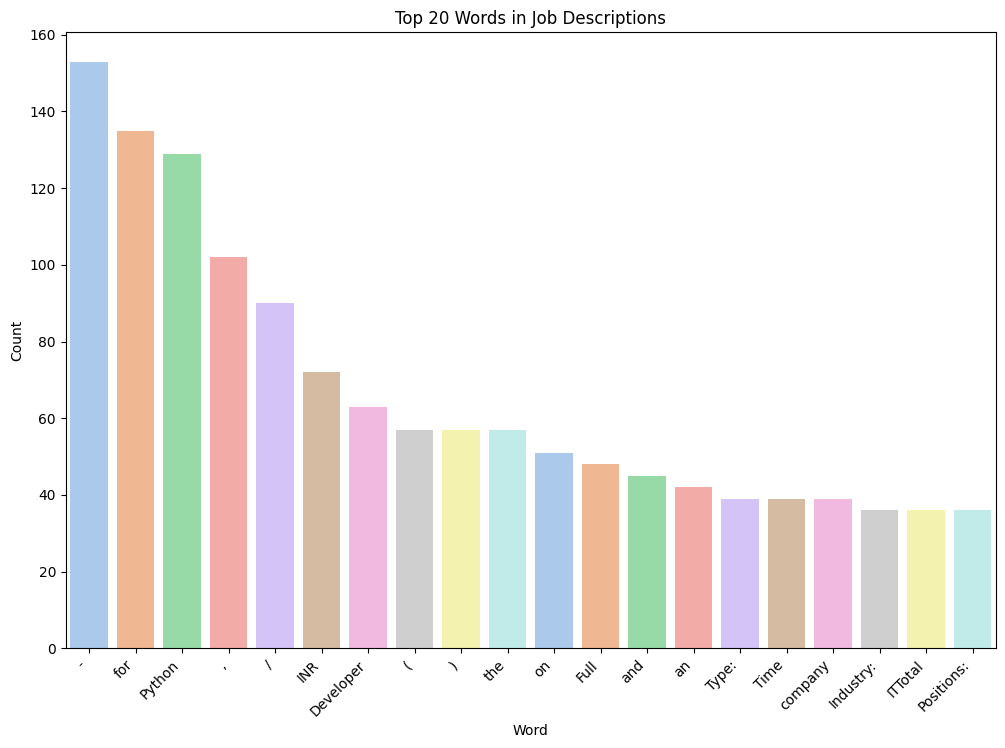

In [19]:
import seaborn as sns
from collections import Counter

# Combine all job descriptions into a single string
job_descriptions = " ".join(df['Desc'])

# Tokenize the words and count their occurrences
words_count = Counter(job_descriptions.split())

# Get the top 20 words
top_words = words_count.most_common(20)

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette='pastel')
plt.title('Top 20 Words in Job Descriptions')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


## **Observation:**
* The frequency of each word is indicated by its size in this word cloud, which shows the most often used terms in job descriptions.  Your chances of being shortlisted through their ATS are very high if you include these words in your resume.


##**Conclusion:**

An excellent example of using Python to extract job-related data from the TimesJobs website can be found in this web scraping project. Using popular libraries like pandas, BeautifulSoup, and requests, it demonstrates how to automate the data extraction process. You can modify the script to scrape job listings for different positions, regions, or more information, making it a flexible tool for gathering information from online job portals. The retrieved data can be readily evaluated or consulted for upcoming research because it is structured.